<a href="https://colab.research.google.com/github/yaniv256/VAEs-in-Economics/blob/master/Notebooks/Time_use_shares_with_vaes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sun Feb 23 12:34:36 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
from tensorflow.keras import backend as K   # Use tensorflow.keras
K.clear_session()

In [0]:

from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow import set_random_seed

from numpy.random import seed

import numpy as np

In [0]:
epochs = 1200
batch_size = 128   

In [5]:
import pandas as pd 
df=pd.read_csv("https://github.com/yaniv256/VAEs-in-Economics/blob/master/Data/Timeuse/time_shares_only_2013.csv?raw=true")
df

Sleeping  ...  Public_health_activities
0           540  ...                         0
1           580  ...                         0
2           450  ...                         0
3           450  ...                         0
4           570  ...                         0
...         ...  ...                       ...
11380       450  ...                         0
11381       455  ...                         0
11382       645  ...                         0
11383       510  ...                         0
11384       385  ...                         0

[11385 rows x 389 columns]

In [6]:
from sklearn.preprocessing import QuantileTransformer

qt_trans = QuantileTransformer(n_quantiles=1000, random_state=0)
qt = pd.DataFrame(qt_trans.fit_transform(df))
qt.columns = df.columns
qt

Sleeping  ...  Public_health_activities
0      0.571572  ...                       0.0
1      0.693193  ...                       0.0
2      0.262262  ...                       0.0
3      0.262262  ...                       0.0
4      0.663163  ...                       0.0
...         ...  ...                       ...
11380  0.262262  ...                       0.0
11381  0.287287  ...                       0.0
11382  0.836837  ...                       0.0
11383  0.466967  ...                       0.0
11384  0.109109  ...                       0.0

[11385 rows x 389 columns]

In [0]:
from sklearn.model_selection import train_test_split 
x_train, x_test = train_test_split(qt, test_size=0.33, random_state=42)
train_examples = x_train.shape[0]
flag_0 = np.zeros((train_examples,1),dtype=x_train.values.dtype)
x_train = np.concatenate((x_train.values,flag_0),axis=-1)
test_examples = x_test.shape[0]
flag_1 = np.ones((test_examples,1),dtype=x_test.values.dtype)
x_test = np.concatenate((x_test.values,flag_1),axis=-1)

In [8]:
!rm -f vaes_net.py
!wget "https://raw.githubusercontent.com/yaniv256/VAEs-in-Economics/master/Notebooks/vaes_net.py"


--2020-02-23 12:34:45--  https://raw.githubusercontent.com/yaniv256/VAEs-in-Economics/master/Notebooks/vaes_net.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10508 (10K) [text/plain]
Saving to: ‘vaes_net.py’

vaes_net.py         100%[===================>]  10.26K  --.-KB/s    in 0s      

2020-02-23 12:34:45 (180 MB/s) - ‘vaes_net.py’ saved [10508/10508]



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
(?, 1)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 390)]        0                                            
__________________________________________________________________________________________________
tf_op_layer_strided_slice_1 (Te [(None, 389)]        0           input_1[0][0]                    
__________________________________________________________________________________________________
gaussian_noise (GaussianNoise)  (None, 389)          0           tf_op_layer_strided_slice_1[0][0]
__________________________________________________________________________________________________
dense (Dense)                   (None, 2048)         800768      gaussian_noise[0][0]             
____

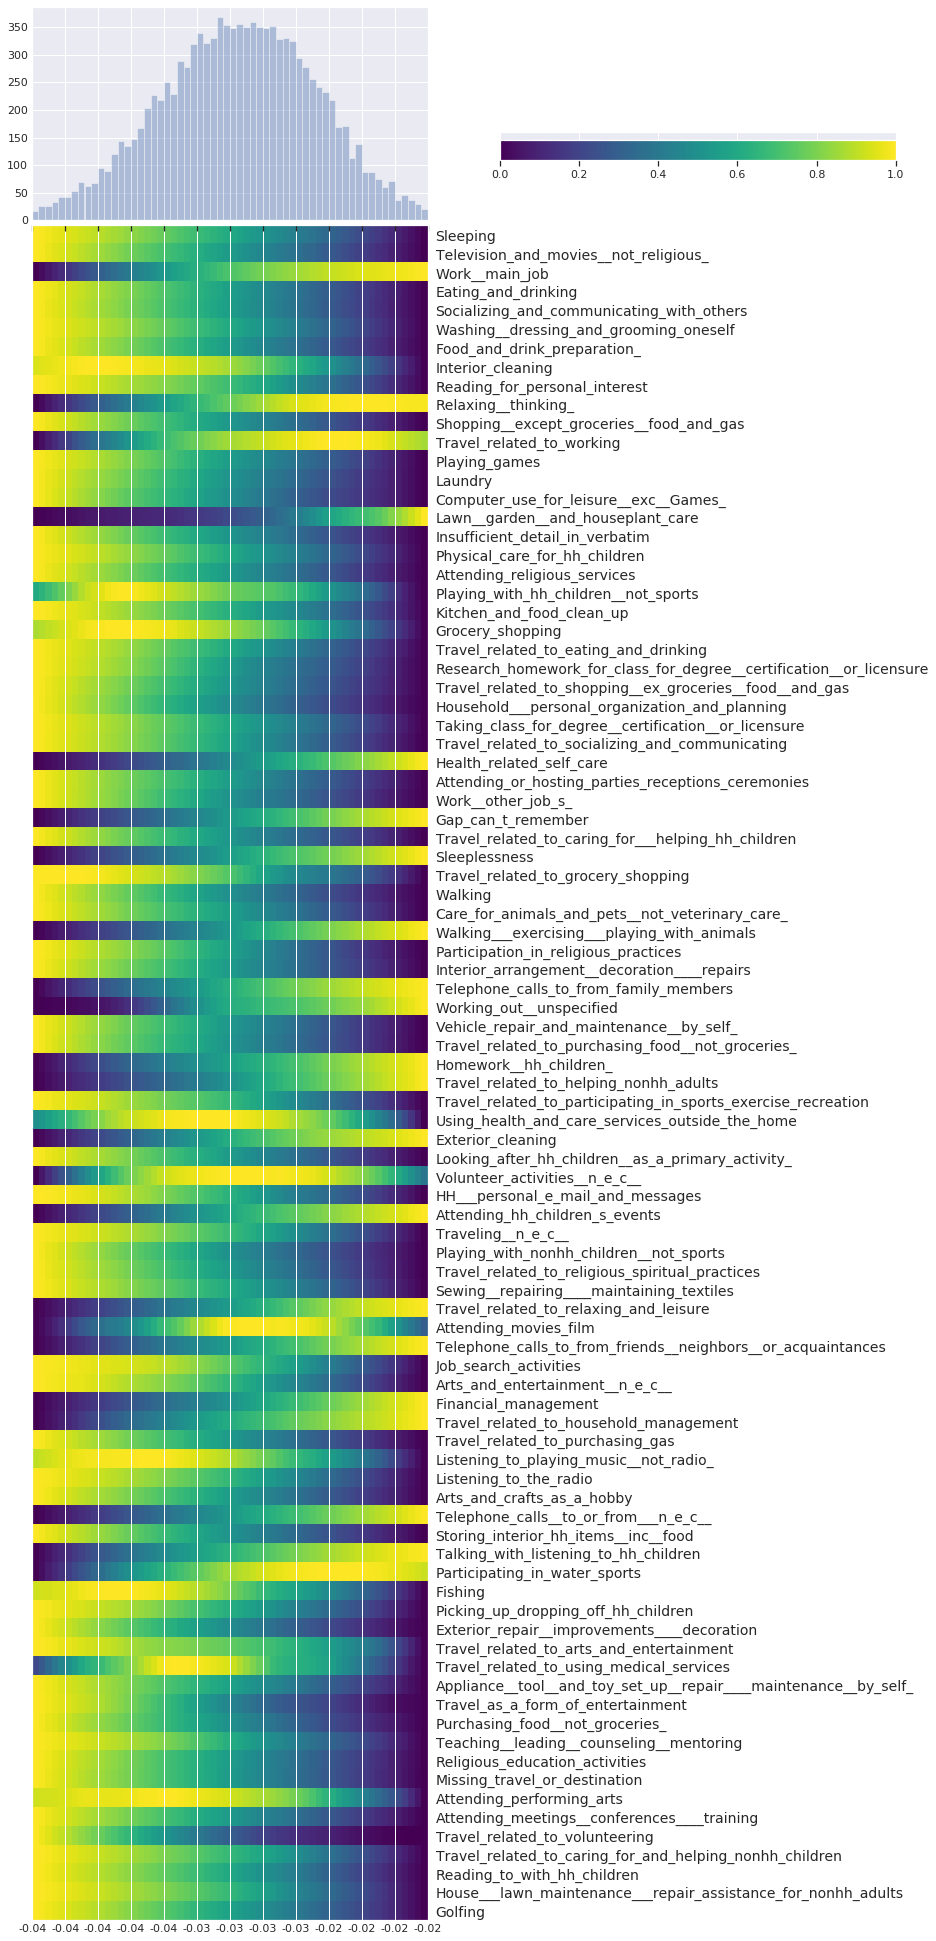

7627/7627 [==============================] - 6s 750us/sample - loss: 0.0170 - val_loss: 0.0159
Epoch 2/1200
7627/7627 [==============================] - 1s 109us/sample - loss: 0.0161 - val_loss: 0.0159
Epoch 3/1200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0160 - val_loss: 0.0160
Epoch 4/1200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0159 - val_loss: 0.0161
Epoch 5/1200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0159 - val_loss: 0.0154
Epoch 6/1200
7627/7627 [==============================] - 1s 108us/sample - loss: 0.0157 - val_loss: 0.0150
Epoch 7/1200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0156 - val_loss: 0.0148
Epoch 8/1200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0154 - val_loss: 0.0146
Epoch 9/1200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0153 - val_loss: 0.0146
Epoch 10/1200
7627/7627 [================

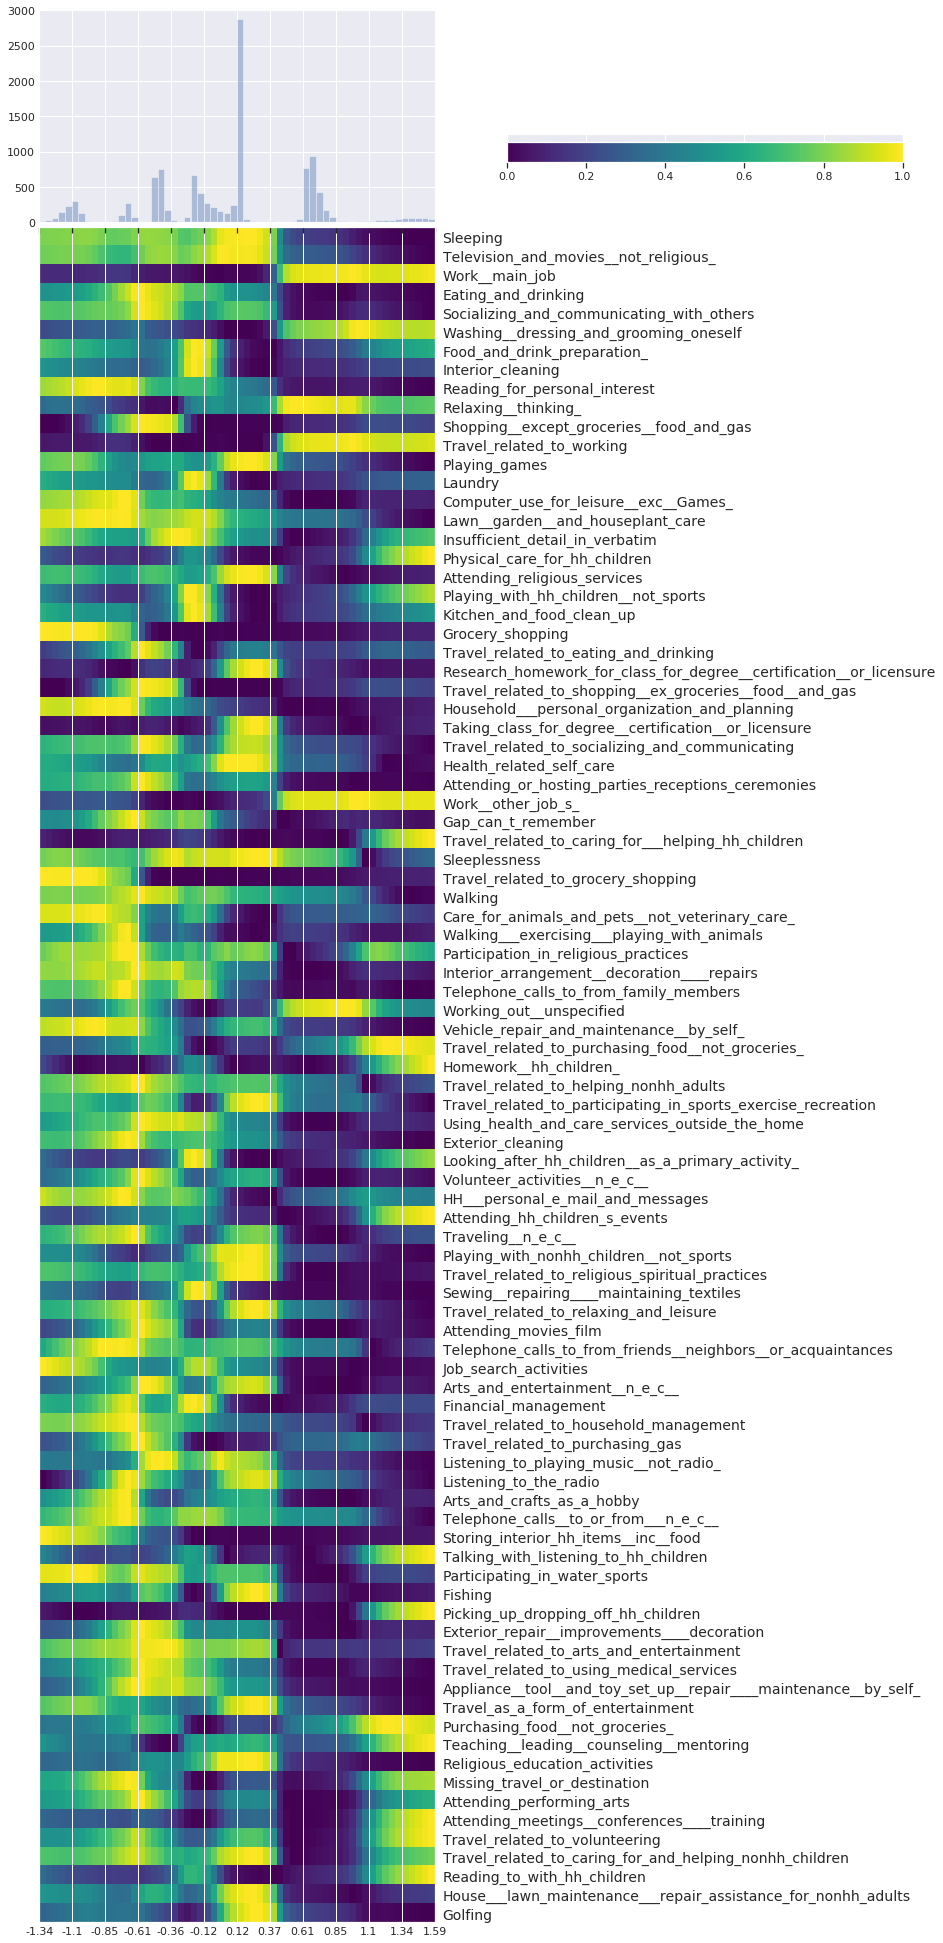

7627/7627 [==============================] - 4s 497us/sample - loss: 0.0146 - val_loss: 0.0135
Epoch 102/1200
7627/7627 [==============================] - 1s 107us/sample - loss: 0.0146 - val_loss: 0.0135
Epoch 103/1200
7168/7627 [===========================>..] - ETA: 0s - loss: 0.0146
Epoch 00103: ReduceLROnPlateau reducing learning rate to 0.0008100000384729356.
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0146 - val_loss: 0.0135
Epoch 104/1200
7627/7627 [==============================] - 1s 111us/sample - loss: 0.0146 - val_loss: 0.0135
Epoch 105/1200
7627/7627 [==============================] - 1s 107us/sample - loss: 0.0146 - val_loss: 0.0134
Epoch 106/1200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0146 - val_loss: 0.0135
Epoch 107/1200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0146 - val_loss: 0.0135
Epoch 108/1200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0146 - val_

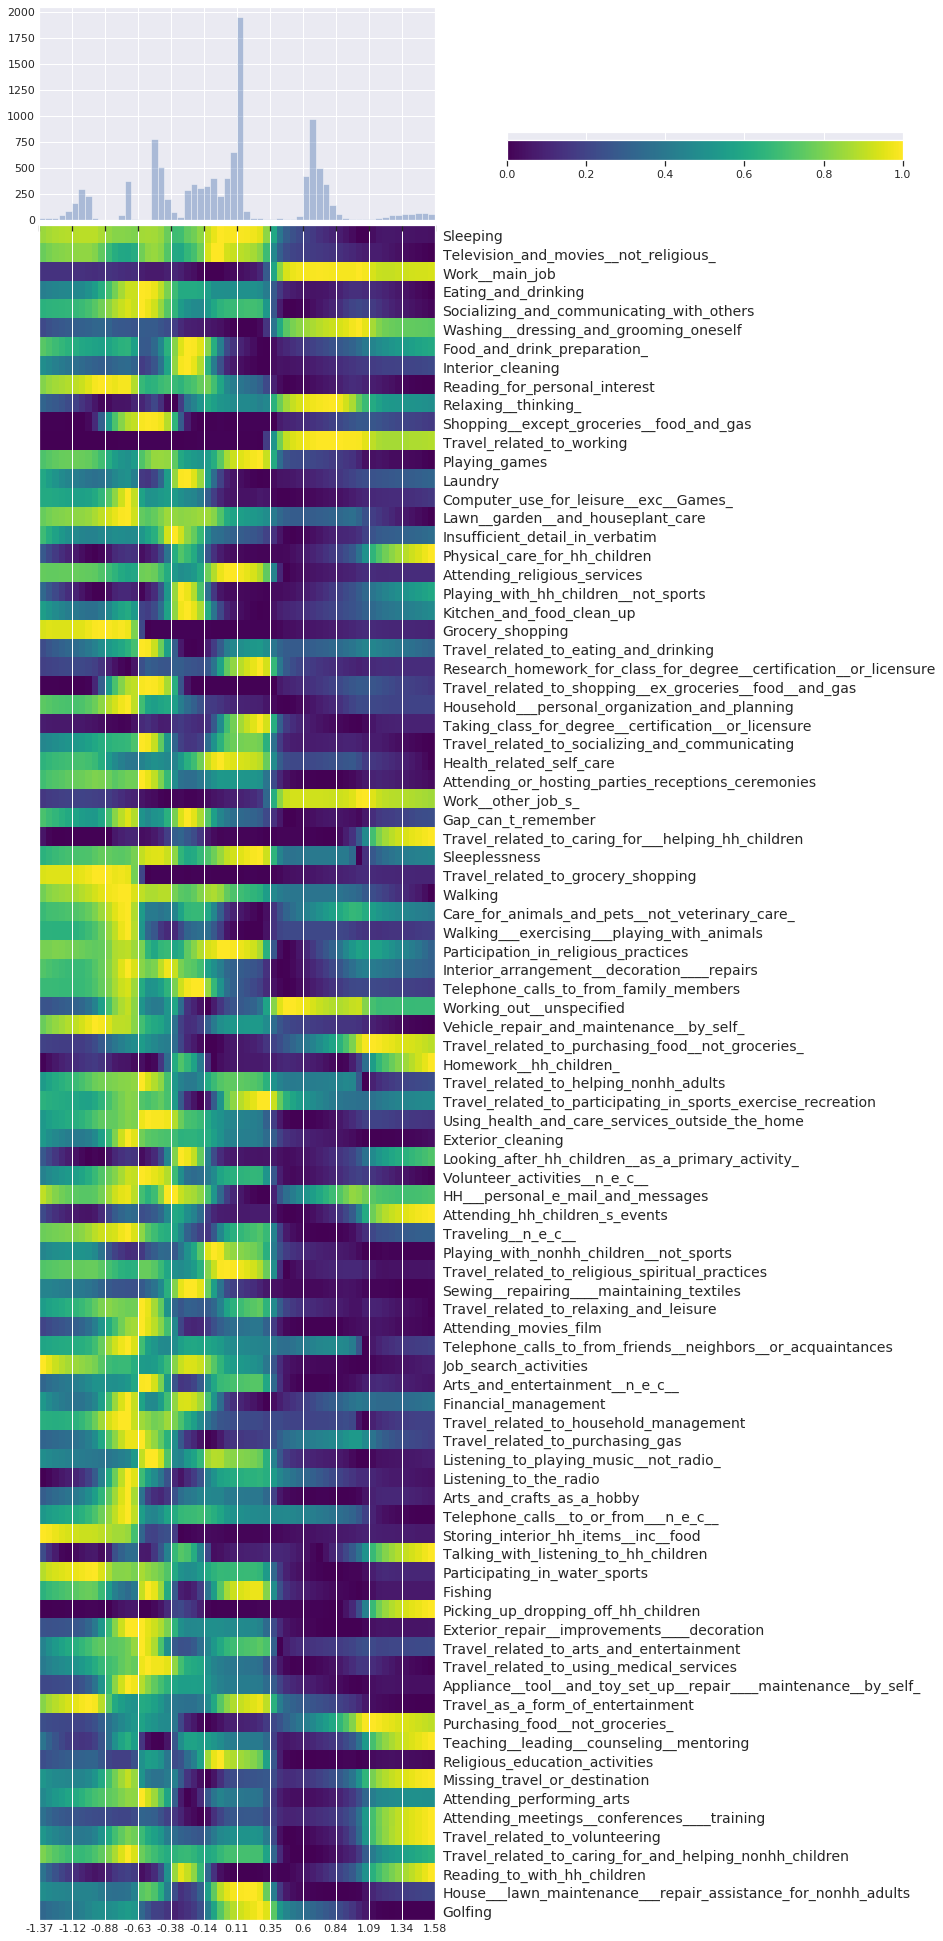

7627/7627 [==============================] - 4s 536us/sample - loss: 0.0144 - val_loss: 0.0134
Epoch 202/1200
7627/7627 [==============================] - 1s 109us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 203/1200
7627/7627 [==============================] - 1s 105us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 204/1200
7627/7627 [==============================] - 1s 109us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 205/1200
7627/7627 [==============================] - 1s 109us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 206/1200
7168/7627 [===========================>..] - ETA: 0s - loss: 0.0145
Epoch 00206: ReduceLROnPlateau reducing learning rate to 0.0005904900433961303.
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 207/1200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0144 - val_loss: 0.0134
Epoch 208/1200
7627/7627 [==============================] - 1s 105us/sample - loss: 0.0145 - val_

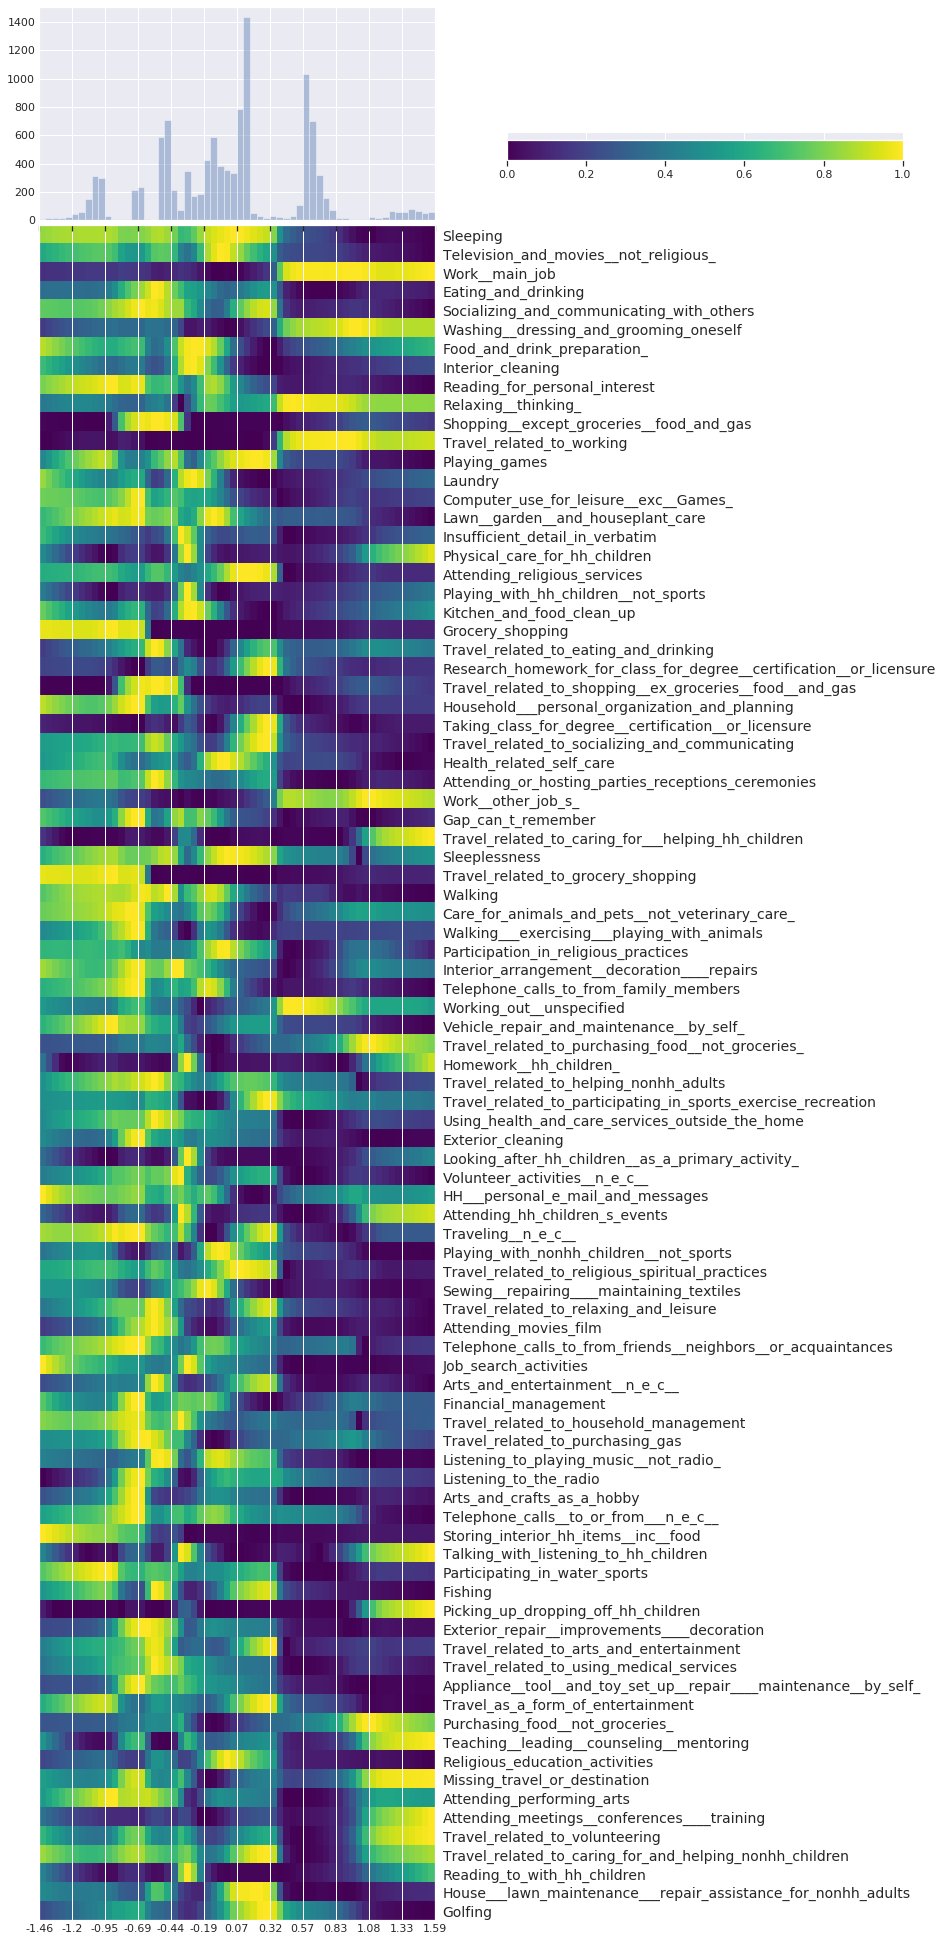

7627/7627 [==============================] - 4s 495us/sample - loss: 0.0144 - val_loss: 0.0133
Epoch 302/1200
7627/7627 [==============================] - 1s 110us/sample - loss: 0.0144 - val_loss: 0.0132
Epoch 303/1200
7627/7627 [==============================] - 1s 105us/sample - loss: 0.0144 - val_loss: 0.0133
Epoch 304/1200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0144 - val_loss: 0.0133
Epoch 305/1200
7627/7627 [==============================] - 1s 105us/sample - loss: 0.0144 - val_loss: 0.0133
Epoch 306/1200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0144 - val_loss: 0.0133
Epoch 307/1200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0144 - val_loss: 0.0133
Epoch 308/1200
7627/7627 [==============================] - 1s 104us/sample - loss: 0.0144 - val_loss: 0.0133
Epoch 309/1200
7627/7627 [==============================] - 1s 107us/sample - loss: 0.0144 - val_loss: 0.0132
Epoch 310/1200
7627/7627 

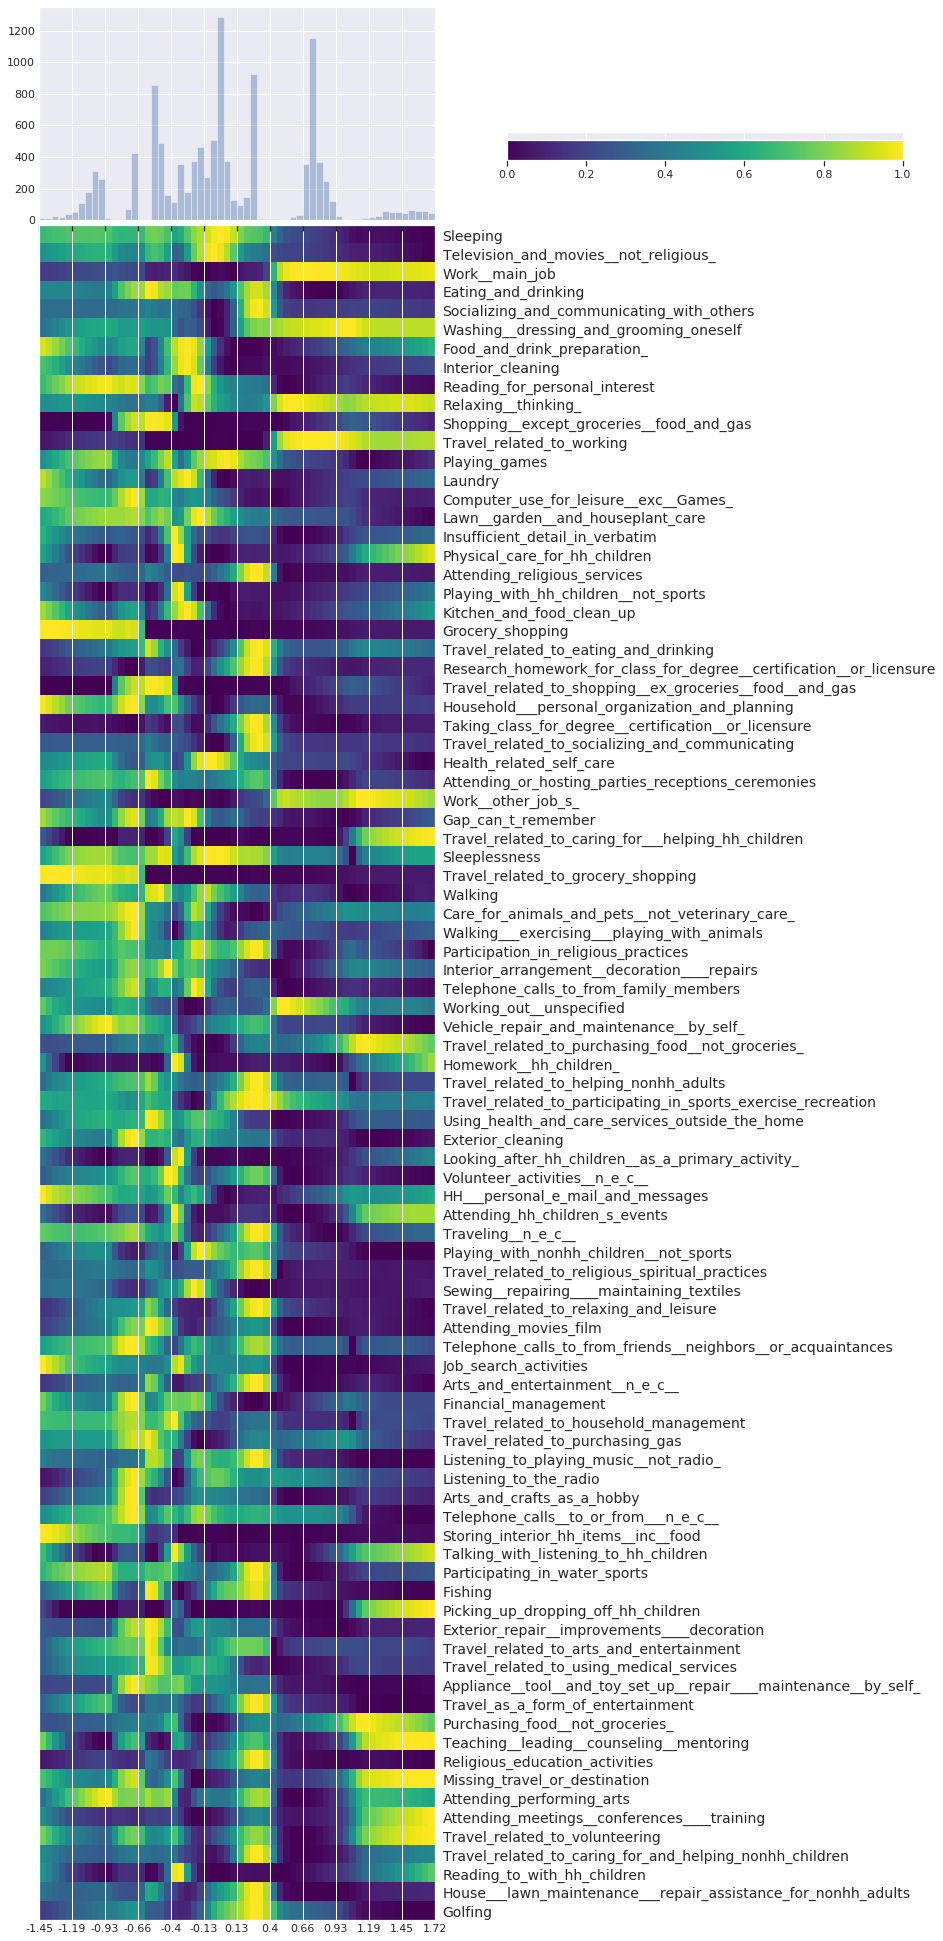

7627/7627 [==============================] - 4s 505us/sample - loss: 0.0143 - val_loss: 0.0130
Epoch 402/1200
7627/7627 [==============================] - 1s 113us/sample - loss: 0.0143 - val_loss: 0.0131
Epoch 403/1200
7627/7627 [==============================] - 1s 114us/sample - loss: 0.0143 - val_loss: 0.0130
Epoch 404/1200
7627/7627 [==============================] - 1s 115us/sample - loss: 0.0143 - val_loss: 0.0131
Epoch 405/1200
7627/7627 [==============================] - 1s 114us/sample - loss: 0.0143 - val_loss: 0.0131
Epoch 406/1200
7627/7627 [==============================] - 1s 113us/sample - loss: 0.0142 - val_loss: 0.0131
Epoch 407/1200
7627/7627 [==============================] - 1s 115us/sample - loss: 0.0143 - val_loss: 0.0130
Epoch 408/1200
7627/7627 [==============================] - 1s 115us/sample - loss: 0.0143 - val_loss: 0.0130
Epoch 409/1200
7552/7627 [============================>.] - ETA: 0s - loss: 0.0143
Epoch 00409: ReduceLROnPlateau reducing learning rat

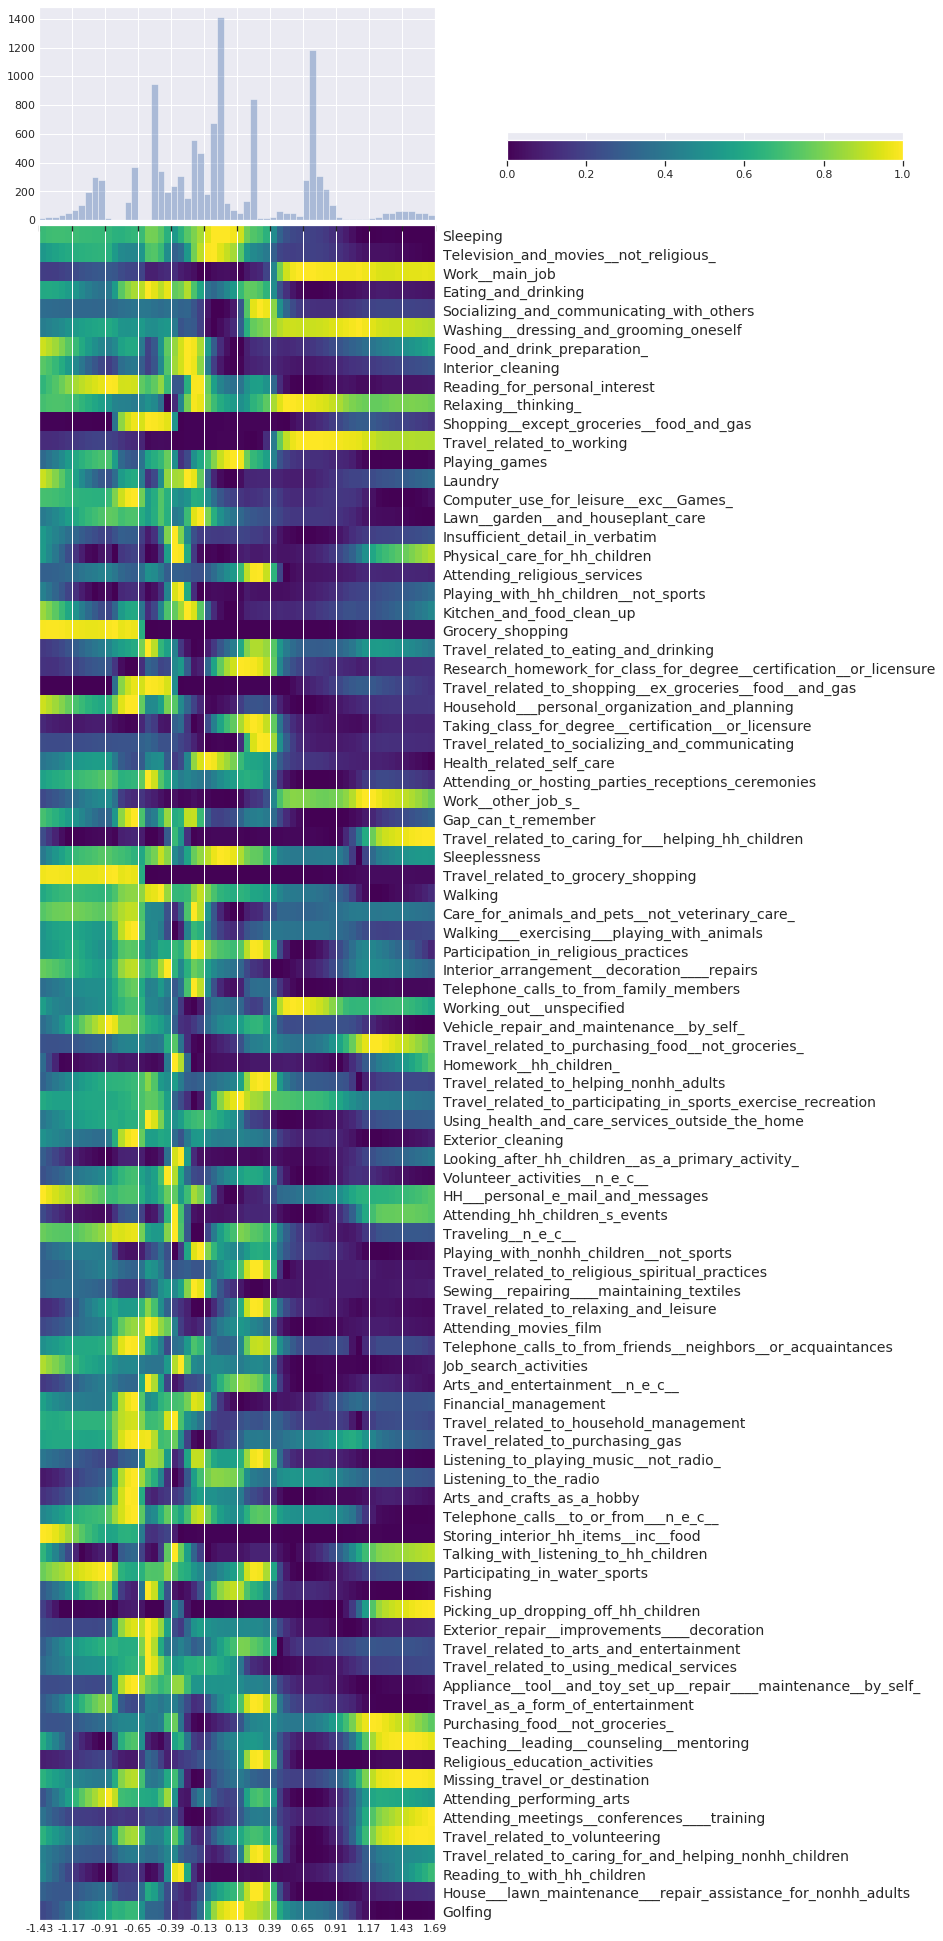

7627/7627 [==============================] - 4s 526us/sample - loss: 0.0142 - val_loss: 0.0130
Epoch 502/1200
7627/7627 [==============================] - 1s 119us/sample - loss: 0.0142 - val_loss: 0.0130
Epoch 503/1200
7627/7627 [==============================] - 1s 110us/sample - loss: 0.0142 - val_loss: 0.0130
Epoch 504/1200
7627/7627 [==============================] - 1s 111us/sample - loss: 0.0142 - val_loss: 0.0130
Epoch 505/1200
7627/7627 [==============================] - 1s 111us/sample - loss: 0.0142 - val_loss: 0.0130
Epoch 506/1200
7627/7627 [==============================] - 1s 112us/sample - loss: 0.0142 - val_loss: 0.0130
Epoch 507/1200
7627/7627 [==============================] - 1s 112us/sample - loss: 0.0142 - val_loss: 0.0129
Epoch 508/1200
7627/7627 [==============================] - 1s 111us/sample - loss: 0.0142 - val_loss: 0.0130
Epoch 509/1200
7627/7627 [==============================] - 1s 111us/sample - loss: 0.0141 - val_loss: 0.0130
Epoch 510/1200
7627/7627 

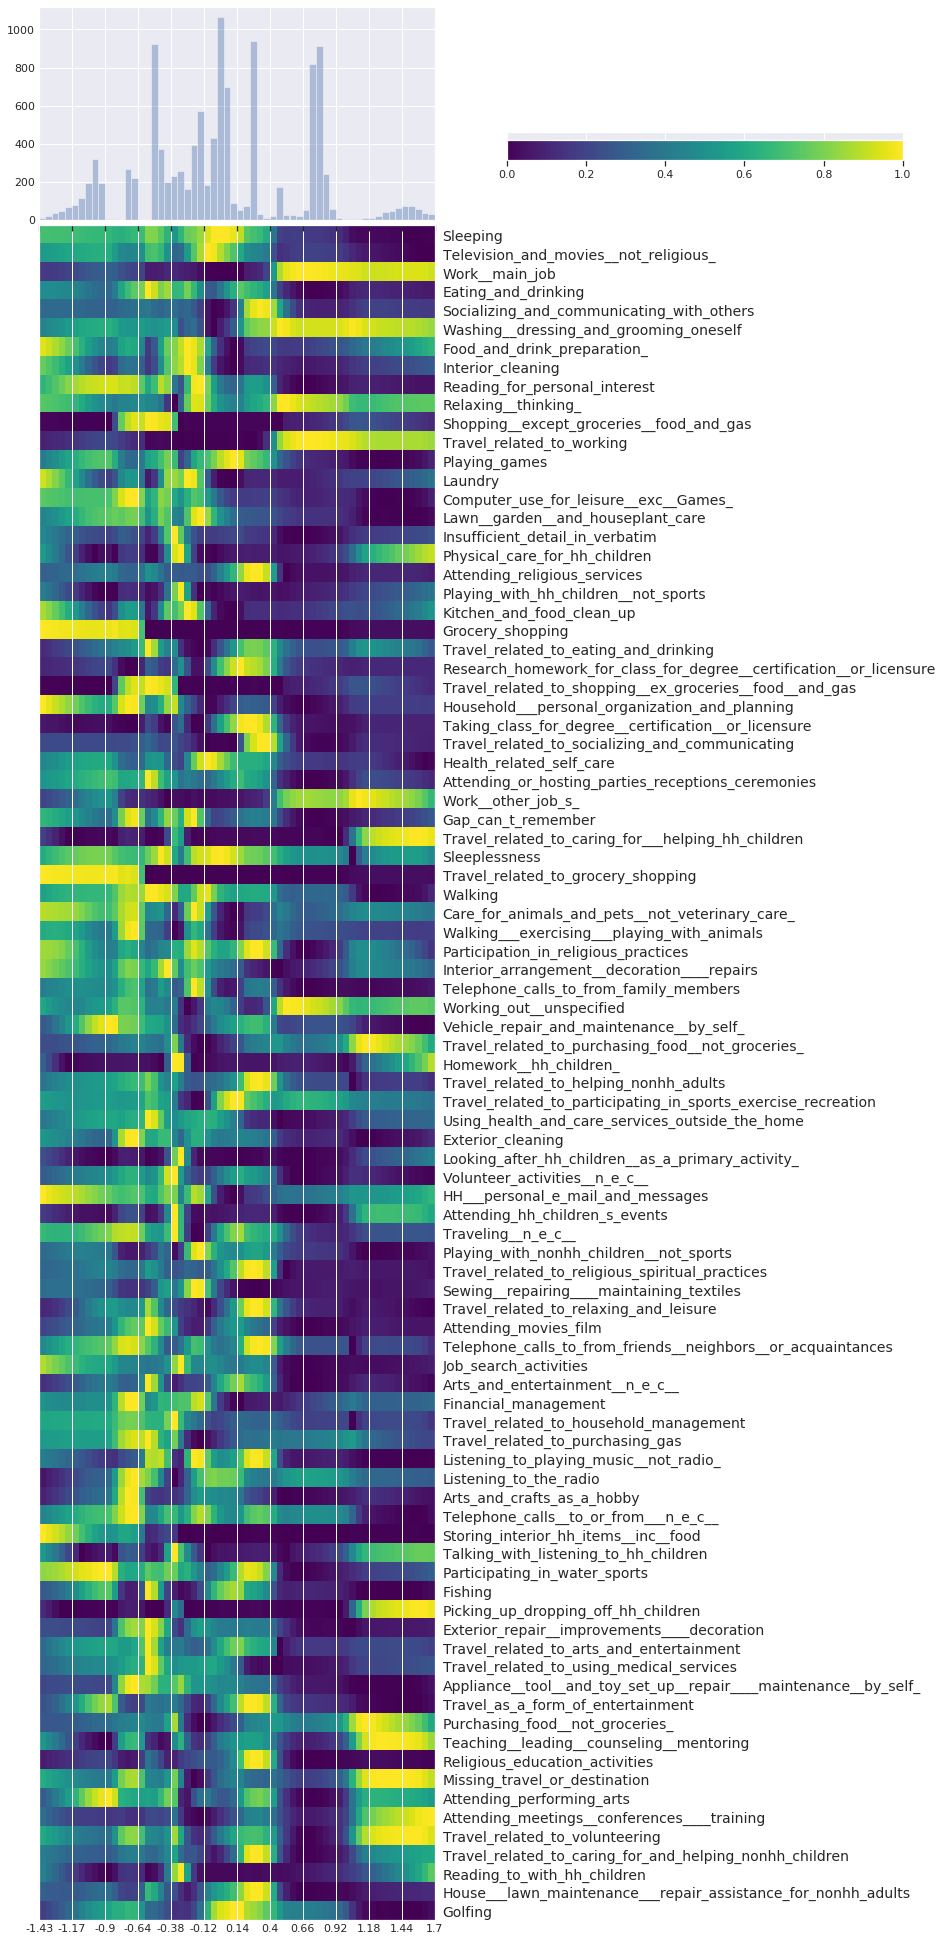

7627/7627 [==============================] - 4s 513us/sample - loss: 0.0141 - val_loss: 0.0129
Epoch 602/1200
7168/7627 [===========================>..] - ETA: 0s - loss: 0.0141
Epoch 00602: ReduceLROnPlateau reducing learning rate to 0.00016677183302817866.
7627/7627 [==============================] - 1s 115us/sample - loss: 0.0141 - val_loss: 0.0129
Epoch 603/1200
7627/7627 [==============================] - 1s 111us/sample - loss: 0.0141 - val_loss: 0.0129
Epoch 604/1200
7627/7627 [==============================] - 1s 111us/sample - loss: 0.0141 - val_loss: 0.0129
Epoch 605/1200
7627/7627 [==============================] - 1s 111us/sample - loss: 0.0141 - val_loss: 0.0129
Epoch 606/1200
7627/7627 [==============================] - 1s 111us/sample - loss: 0.0141 - val_loss: 0.0129
Epoch 607/1200
7627/7627 [==============================] - 1s 113us/sample - loss: 0.0141 - val_loss: 0.0129
Epoch 608/1200
7627/7627 [==============================] - 1s 111us/sample - loss: 0.0141 - val

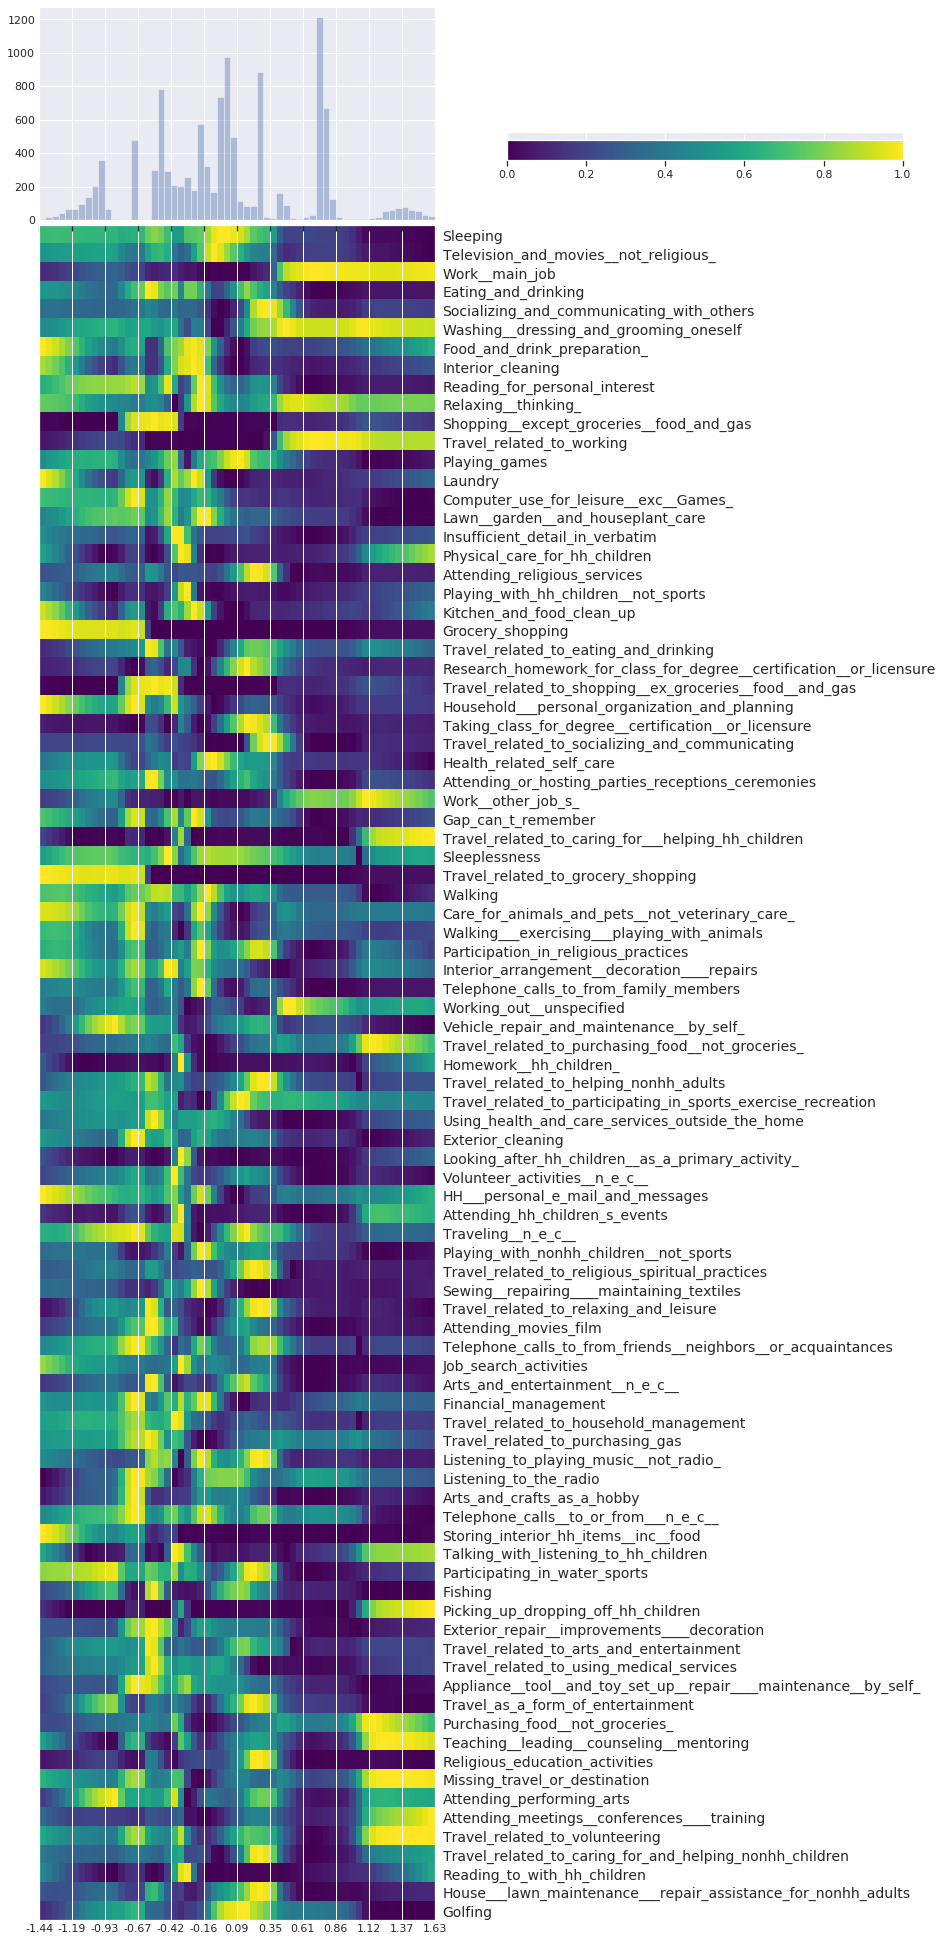

7627/7627 [==============================] - 4s 527us/sample - loss: 0.0141 - val_loss: 0.0128
Epoch 702/1200
7627/7627 [==============================] - 1s 114us/sample - loss: 0.0141 - val_loss: 0.0128
Epoch 703/1200
7627/7627 [==============================] - 1s 110us/sample - loss: 0.0141 - val_loss: 0.0128
Epoch 704/1200
7627/7627 [==============================] - 1s 112us/sample - loss: 0.0141 - val_loss: 0.0128
Epoch 705/1200
7627/7627 [==============================] - 1s 114us/sample - loss: 0.0141 - val_loss: 0.0129
Epoch 706/1200
7627/7627 [==============================] - 1s 110us/sample - loss: 0.0141 - val_loss: 0.0128
Epoch 707/1200
7627/7627 [==============================] - 1s 111us/sample - loss: 0.0141 - val_loss: 0.0128
Epoch 708/1200
7627/7627 [==============================] - 1s 109us/sample - loss: 0.0141 - val_loss: 0.0128
Epoch 709/1200
7627/7627 [==============================] - 1s 112us/sample - loss: 0.0141 - val_loss: 0.0129
Epoch 710/1200
7627/7627 

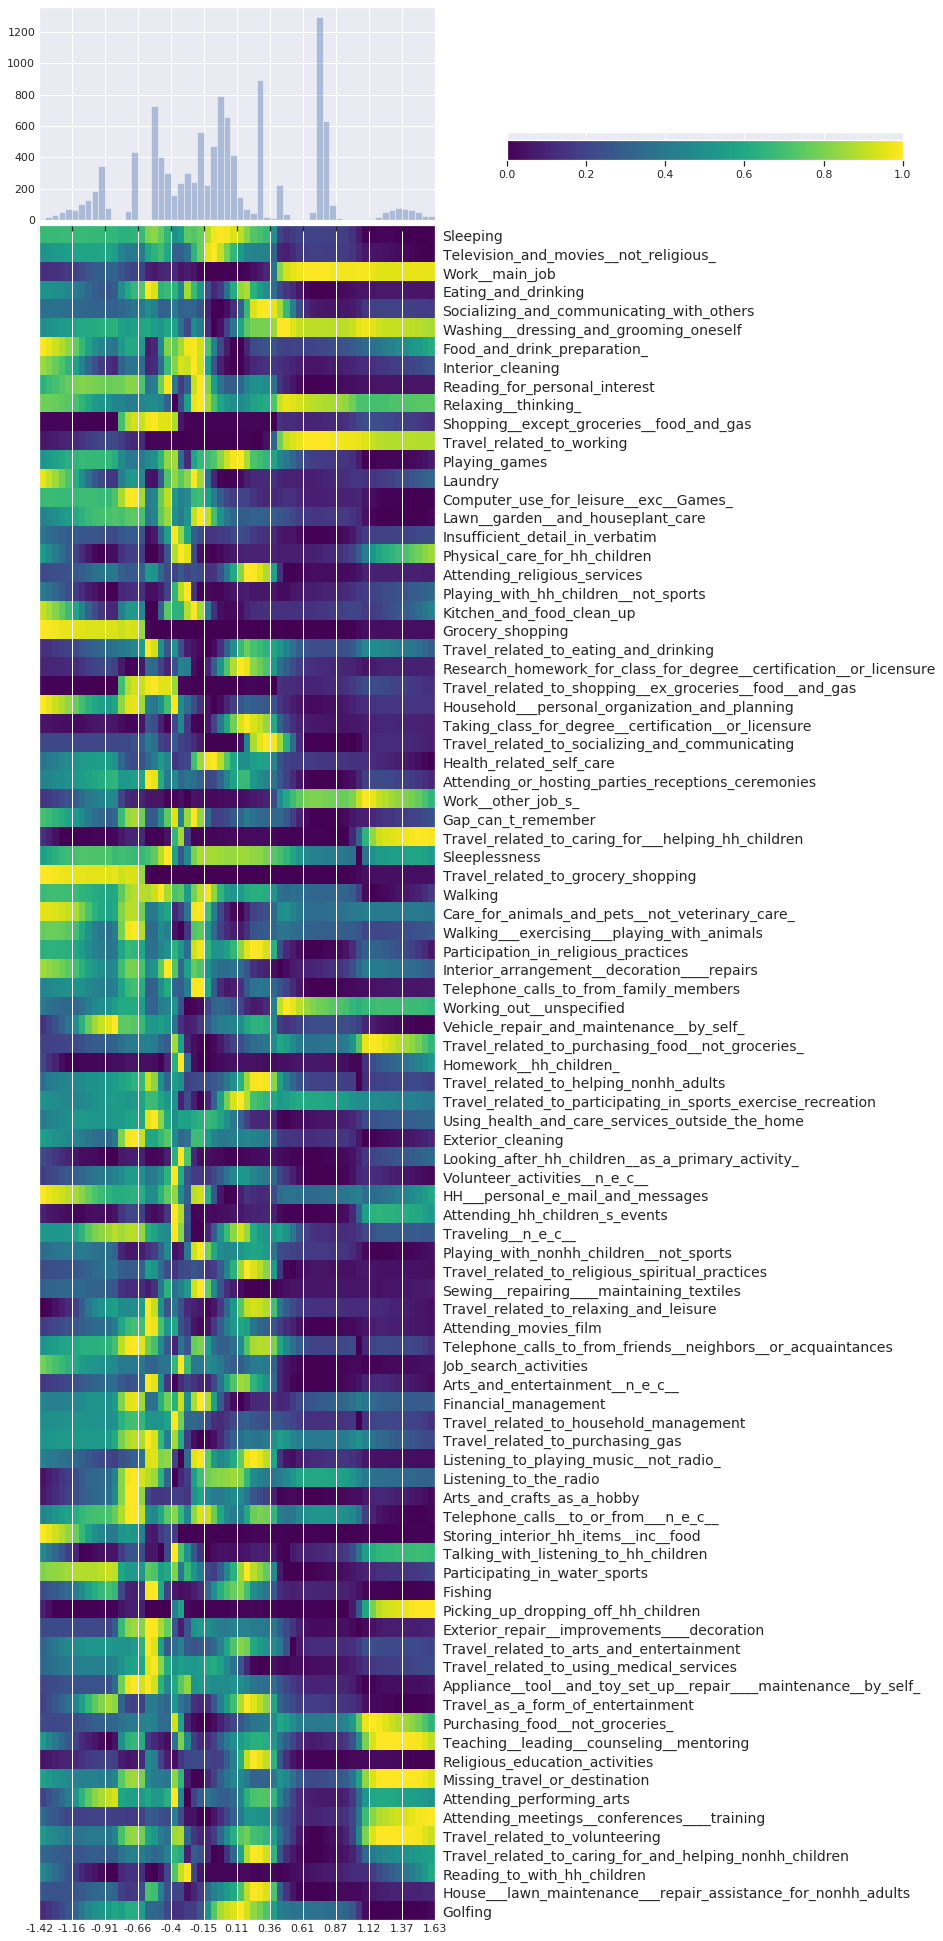

7627/7627 [==============================] - 4s 495us/sample - loss: 0.0140 - val_loss: 0.0128
Epoch 802/1200
7627/7627 [==============================] - 1s 110us/sample - loss: 0.0140 - val_loss: 0.0128
Epoch 803/1200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0140 - val_loss: 0.0128
Epoch 804/1200
7627/7627 [==============================] - 1s 107us/sample - loss: 0.0140 - val_loss: 0.0128
Epoch 805/1200
7627/7627 [==============================] - 1s 108us/sample - loss: 0.0140 - val_loss: 0.0128
Epoch 806/1200
7627/7627 [==============================] - 1s 108us/sample - loss: 0.0140 - val_loss: 0.0128
Epoch 807/1200
7627/7627 [==============================] - 1s 108us/sample - loss: 0.0140 - val_loss: 0.0128
Epoch 808/1200
7627/7627 [==============================] - 1s 107us/sample - loss: 0.0140 - val_loss: 0.0128
Epoch 809/1200
7627/7627 [==============================] - 1s 107us/sample - loss: 0.0140 - val_loss: 0.0128
Epoch 810/1200
7627/7627 

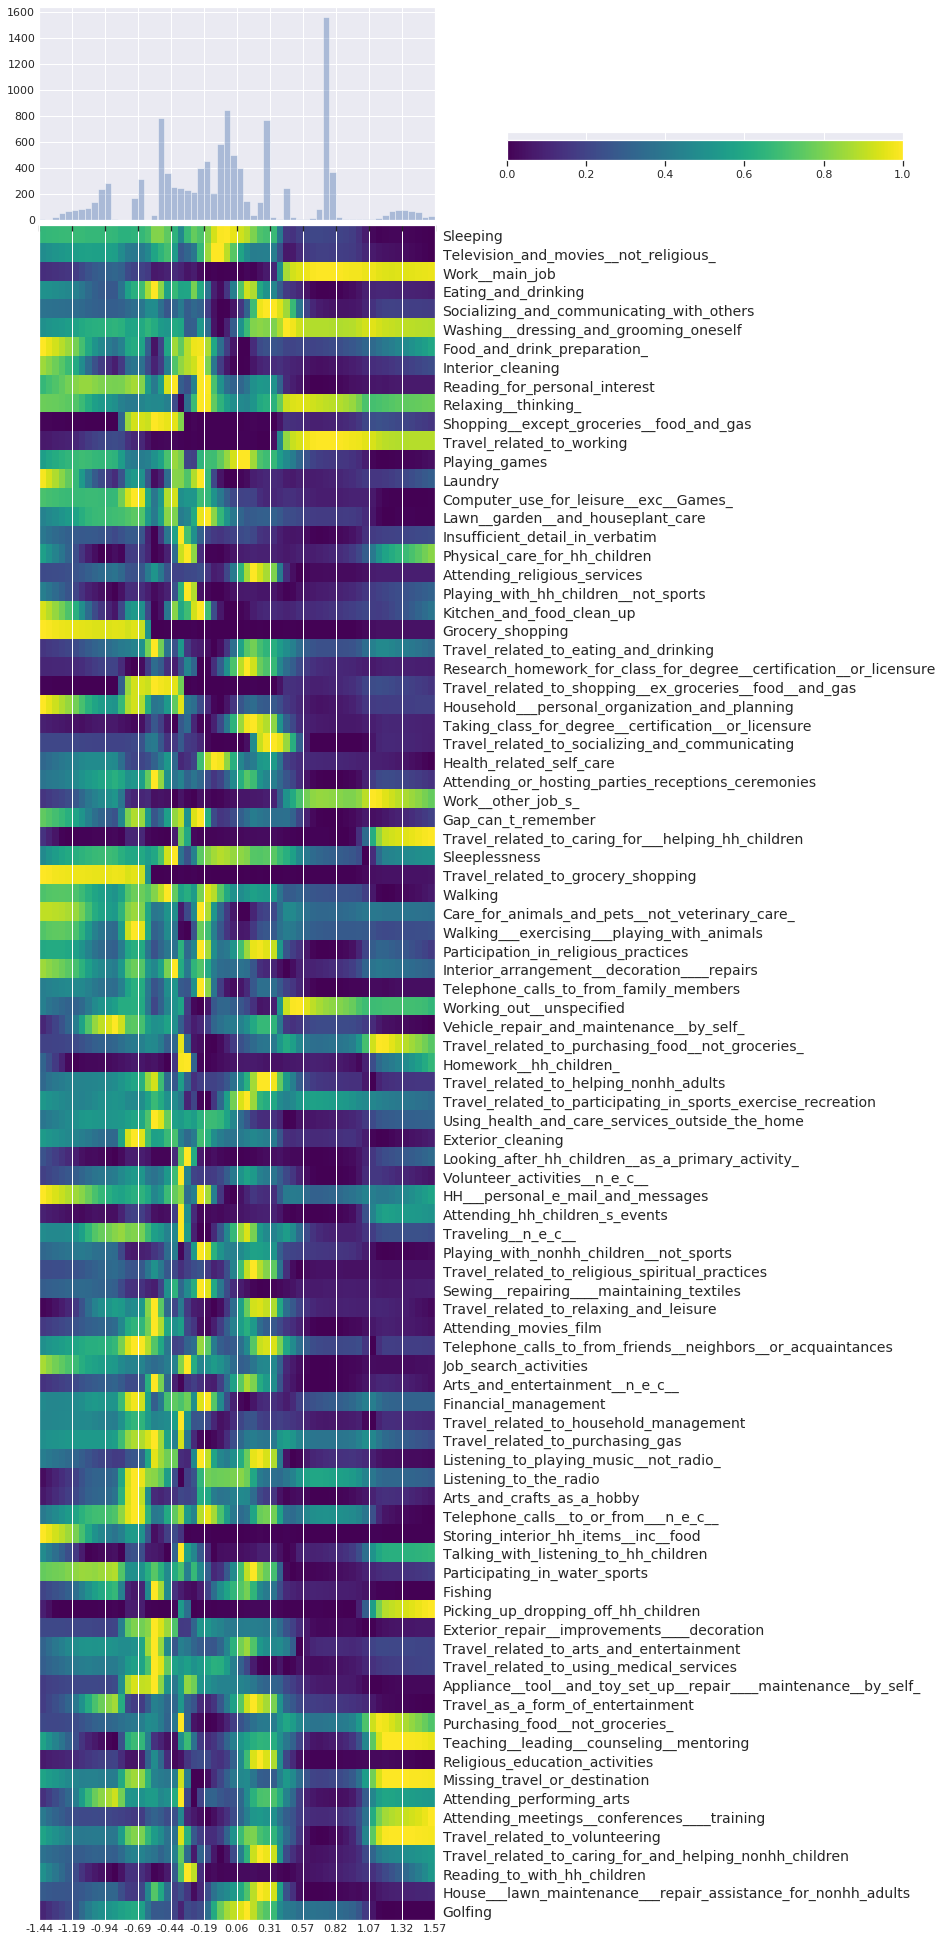

7627/7627 [==============================] - 4s 500us/sample - loss: 0.0140 - val_loss: 0.0128
Epoch 902/1200
7627/7627 [==============================] - 1s 108us/sample - loss: 0.0140 - val_loss: 0.0128
Epoch 903/1200
7627/7627 [==============================] - 1s 107us/sample - loss: 0.0140 - val_loss: 0.0128
Epoch 904/1200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0140 - val_loss: 0.0128
Epoch 905/1200
7627/7627 [==============================] - 1s 107us/sample - loss: 0.0140 - val_loss: 0.0128
Epoch 906/1200
7168/7627 [===========================>..] - ETA: 0s - loss: 0.0140
Epoch 00906: ReduceLROnPlateau reducing learning rate to 5.8149741380475466e-05.
7627/7627 [==============================] - 1s 108us/sample - loss: 0.0140 - val_loss: 0.0128
Epoch 907/1200
7627/7627 [==============================] - 1s 108us/sample - loss: 0.0140 - val_loss: 0.0128
Epoch 908/1200
7627/7627 [==============================] - 1s 108us/sample - loss: 0.0140 - val

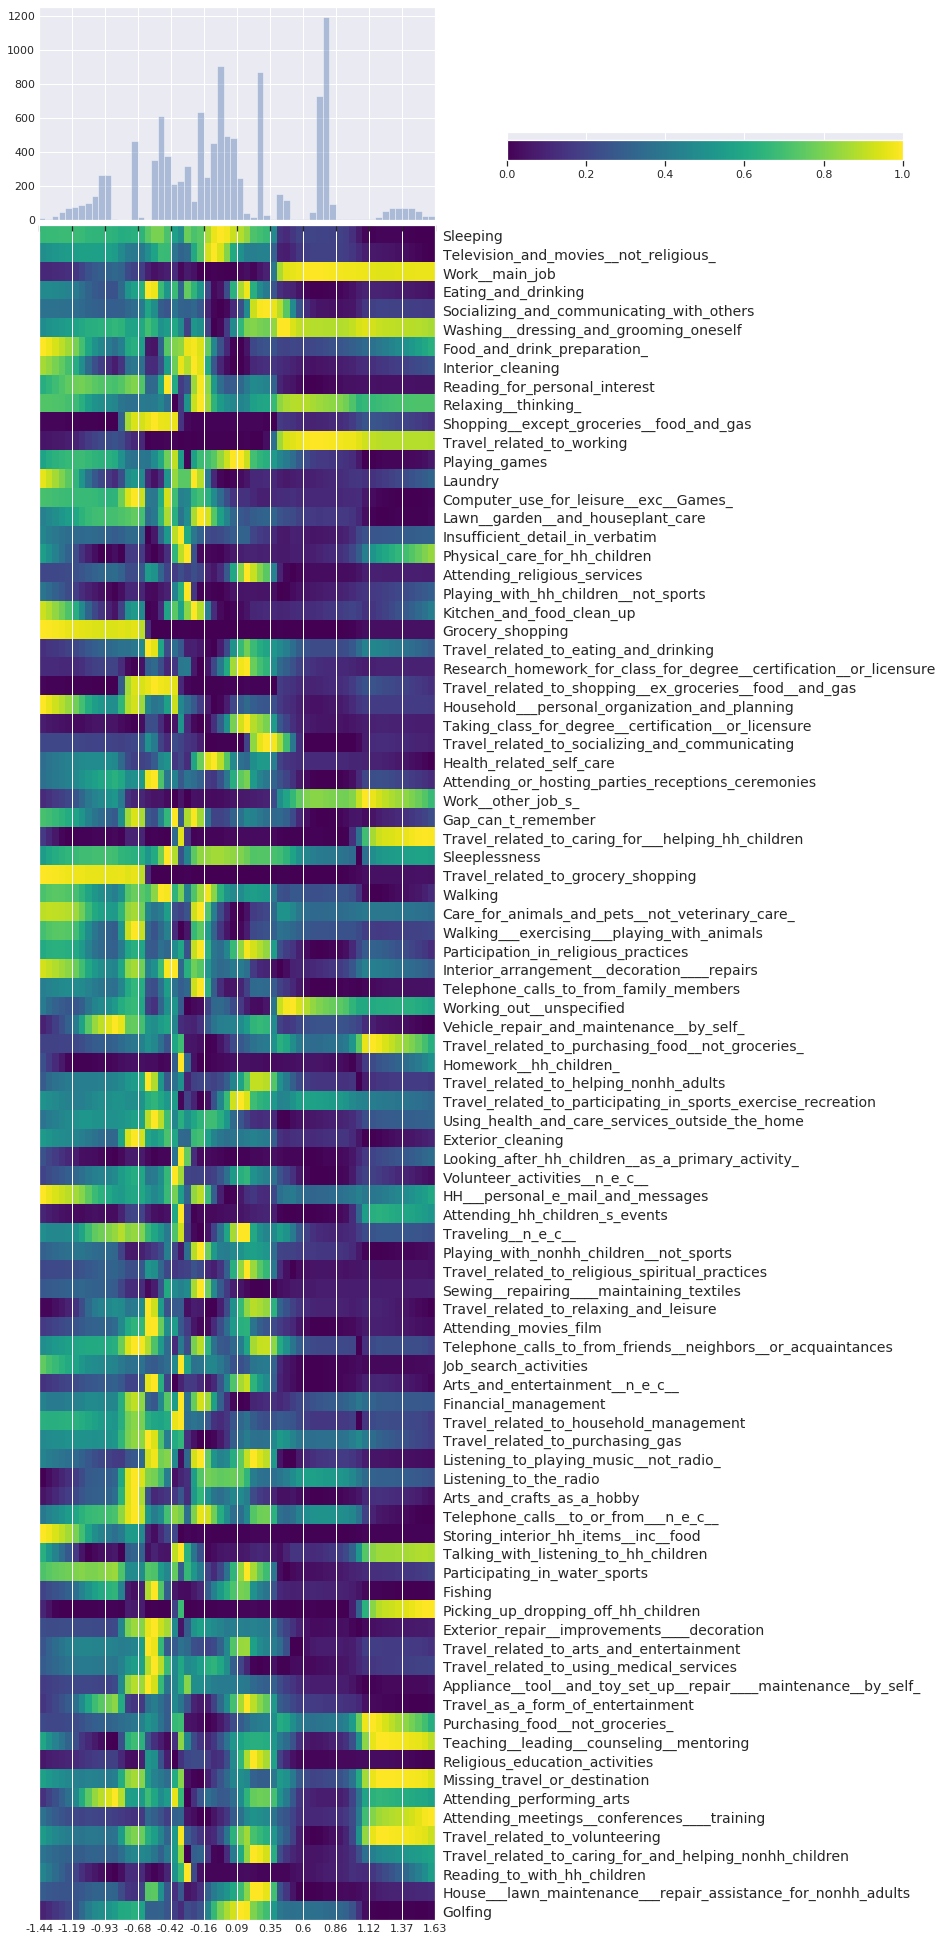

7627/7627 [==============================] - 4s 500us/sample - loss: 0.0140 - val_loss: 0.0128
Epoch 1002/1200
7627/7627 [==============================] - 1s 109us/sample - loss: 0.0140 - val_loss: 0.0128
Epoch 1003/1200
7627/7627 [==============================] - 1s 105us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 1004/1200
7627/7627 [==============================] - 1s 105us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 1005/1200
7627/7627 [==============================] - 1s 108us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 1006/1200
7627/7627 [==============================] - 1s 109us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 1007/1200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 1008/1200
7627/7627 [==============================] - 1s 105us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 1009/1200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 1010/1200
7

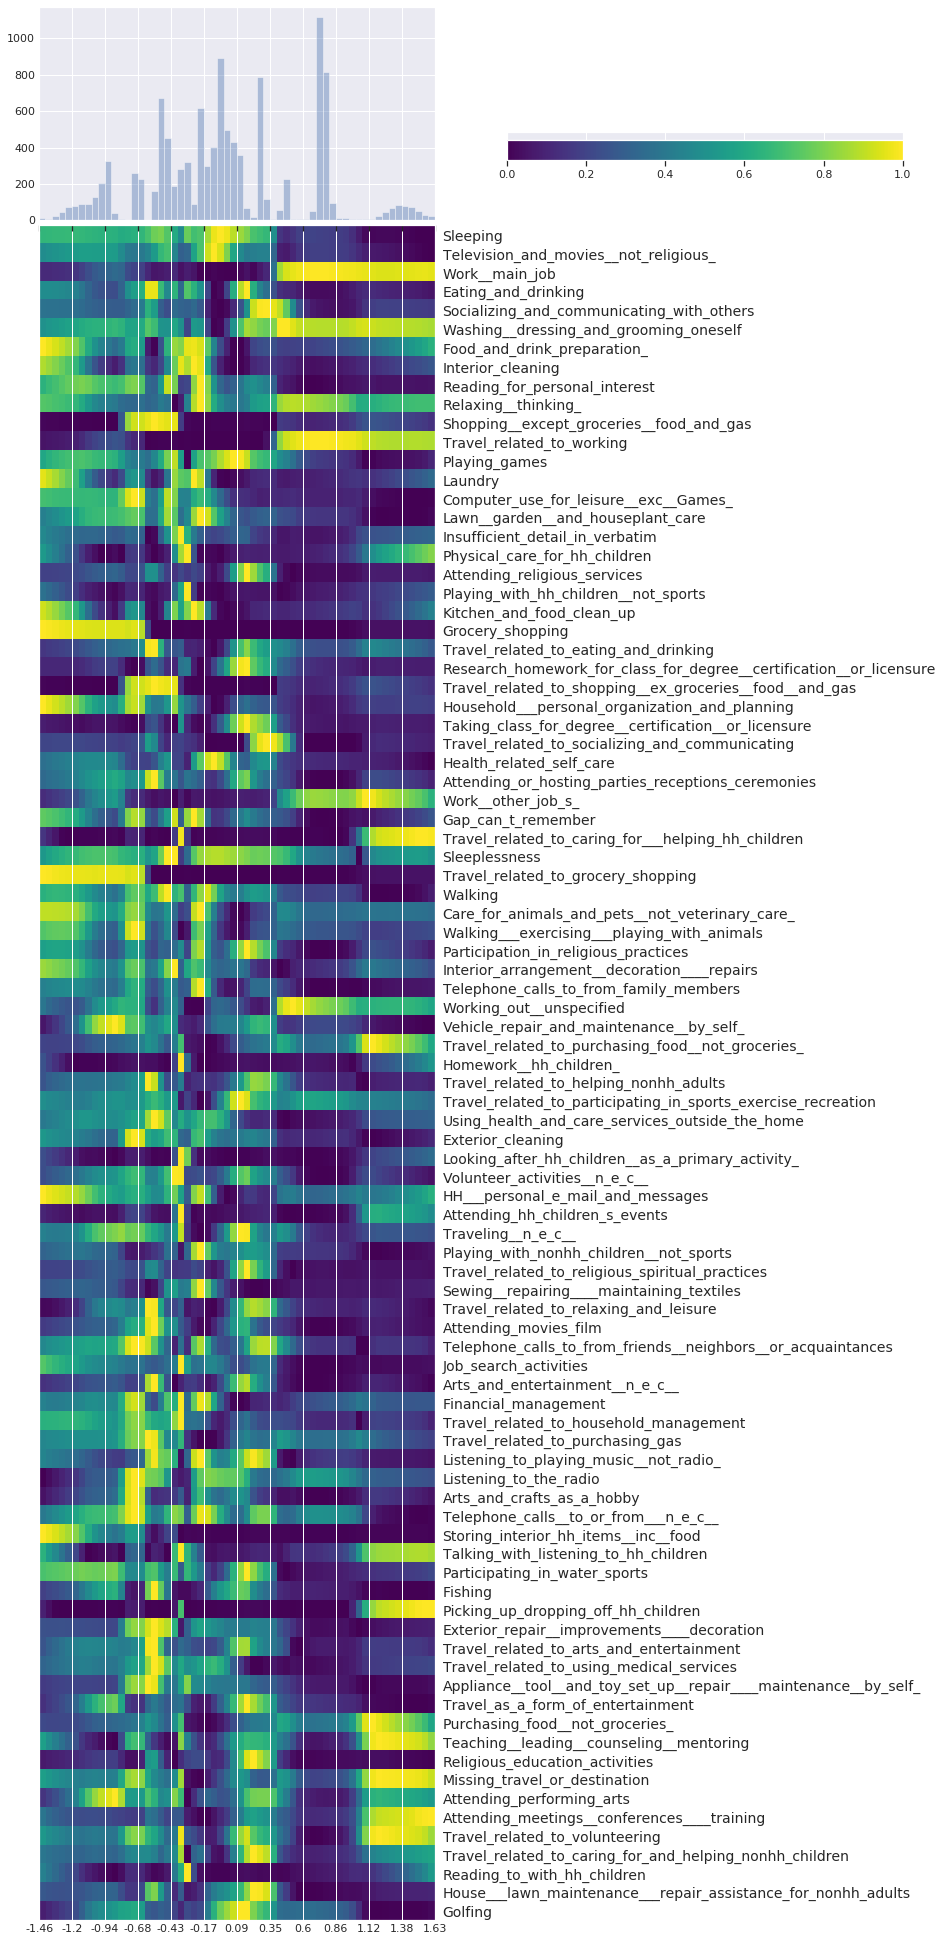

7627/7627 [==============================] - 4s 495us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 1102/1200
7627/7627 [==============================] - 1s 109us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 1103/1200
7627/7627 [==============================] - 1s 108us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 1104/1200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 1105/1200
7168/7627 [===========================>..] - ETA: 0s - loss: 0.0140
Epoch 01105: ReduceLROnPlateau reducing learning rate to 3.0903160222806036e-05.
7627/7627 [==============================] - 1s 105us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 1106/1200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 1107/1200
7627/7627 [==============================] - 1s 110us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 1108/1200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.014

In [9]:
from vaes_net import make_vae, callback_list, plot_types
seed(42)
set_random_seed(42)
vae = make_vae(full_data=qt,  
    img_shape = (389+1, ),
    latent_dim = 1, 
    dense_width = 2048,
    l2_penalty=0.00000000000001,
    l1_penalty=0.0,
    encoder_dropout_rate=0.5,
    decoder_dropout_rate=0.5,
    entanglement_penalty = 2,
    hidden_n = 3)  

vae.summary()

fitted = vae.fit(
    x=x_train, 
    y=None,
    shuffle=True,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, None),
    callbacks = callback_list
    )

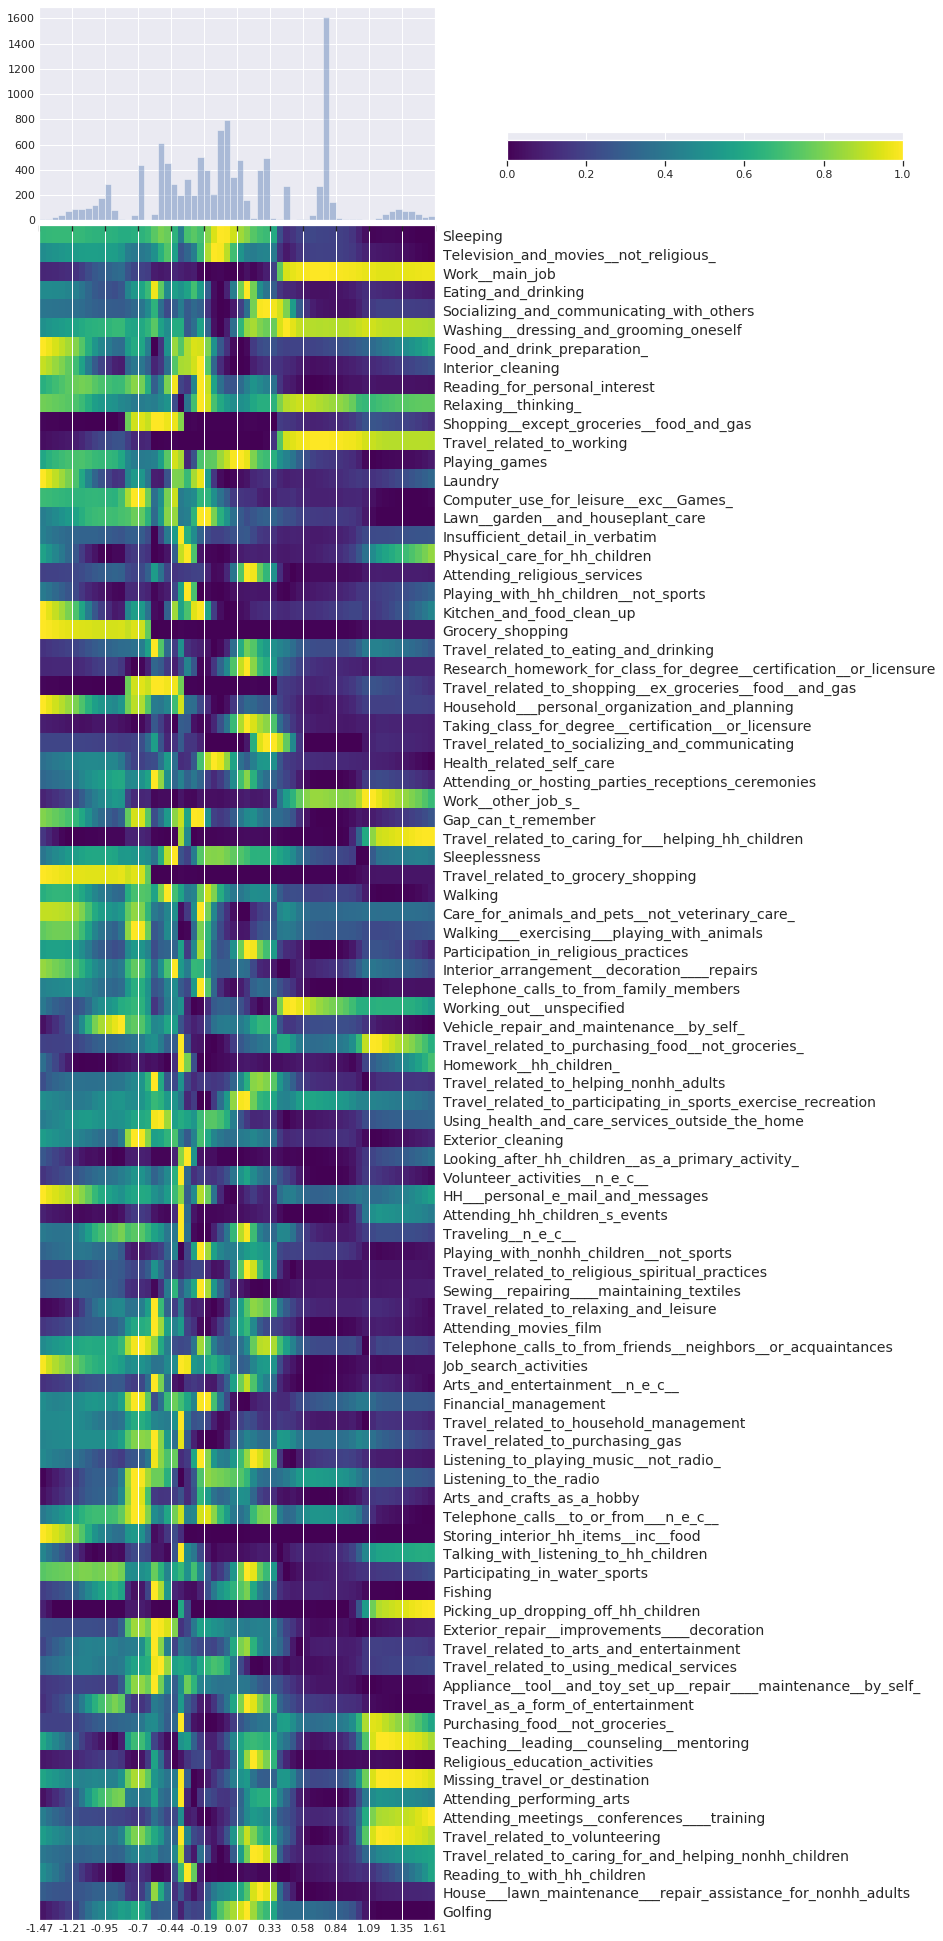

In [10]:
plot_types(encoder=vae.encoder,decoder=vae.decoder,data=qt);

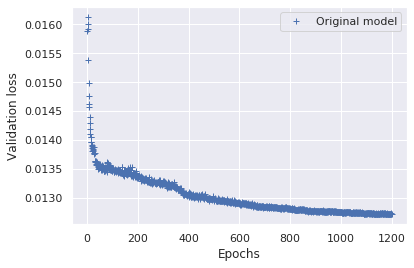

In [11]:
epochs_grid = range(1, epochs+1)
val_loss1 = fitted.history['val_loss']
#val_loss2 = fitted2.history['val_loss']


import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs_grid, val_loss1, 'b+', label='Original model')
# "bo" is for "blue dot"
#plt.plot(epochs_grid, val_loss2, 'bo', label='Alternative model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

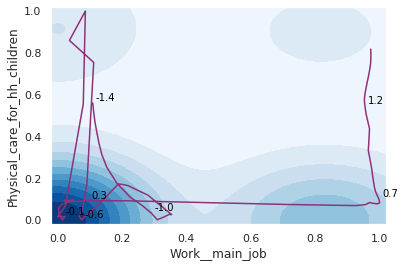

In [12]:
from vaes_net import encode_plot2d
  
encode_plot2d(encoder=vae.encoder,decoder=vae.decoder, 
              data=vae.full_data)

In [13]:

flag_1 = np.ones((qt.shape[0],1),dtype=qt.values.dtype)
data = np.concatenate((qt.values,flag_1),axis=-1)
encoded_data=vae.encoder.predict(data)
pd.DataFrame(encoded_data)

0
0     -0.012817
1     -1.318616
2     -1.119946
3      0.757768
4     -0.070929
...         ...
11380 -0.061747
11381  0.662064
11382  0.694829
11383  0.090065
11384 -0.277367

[11385 rows x 1 columns]

In [14]:
from sklearn.preprocessing import MinMaxScaler

filtered=pd.DataFrame((vae.decoder.predict(encoded_data)))
scaler = MinMaxScaler()
filtered=pd.DataFrame(scaler.fit_transform(filtered))  
filtered.columns = df.columns
filtered

Sleeping  ...  Public_health_activities
0      0.995335  ...                  0.075824
1      0.729656  ...                  0.249368
2      0.724424  ...                  0.189018
3      0.348233  ...                  0.126639
4      0.993737  ...                  0.057696
...         ...  ...                       ...
11380  0.996966  ...                  0.057441
11381  0.356571  ...                  0.131575
11382  0.354076  ...                  0.129033
11383  0.889046  ...                  0.110929
11384  0.811945  ...                  0.277283

[11385 rows x 389 columns]

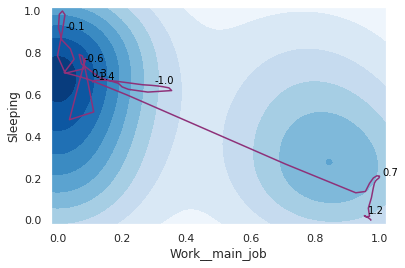

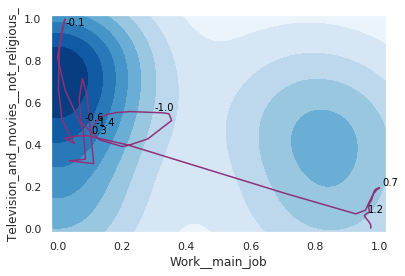

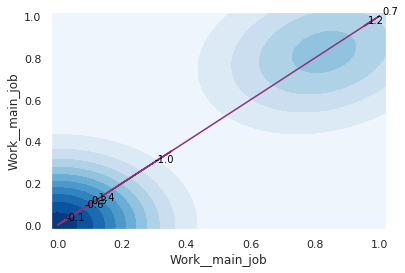

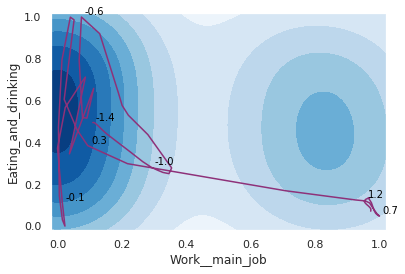

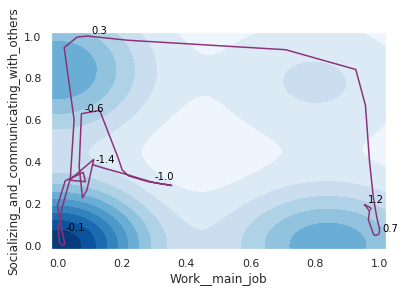

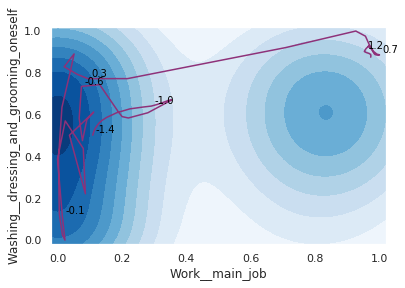

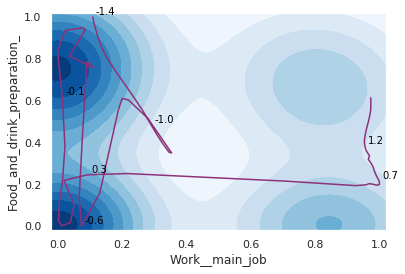

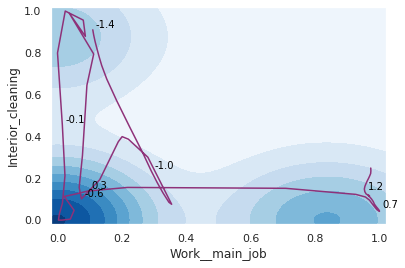

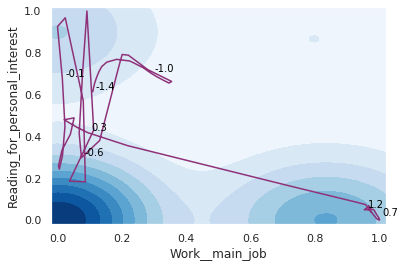

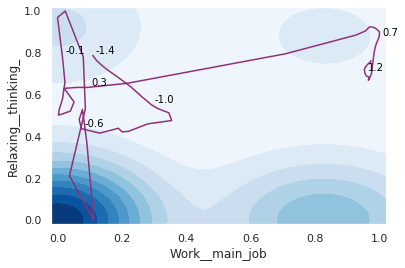

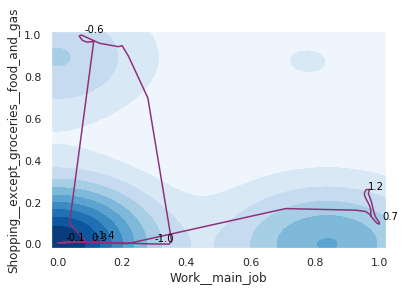

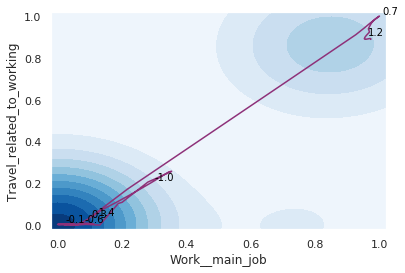

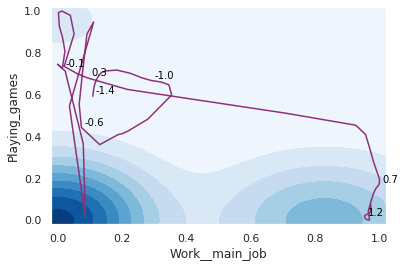

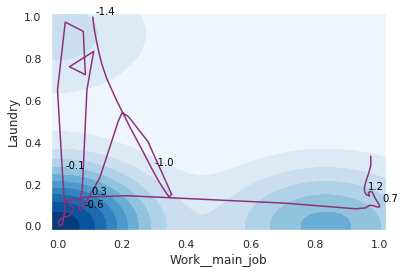

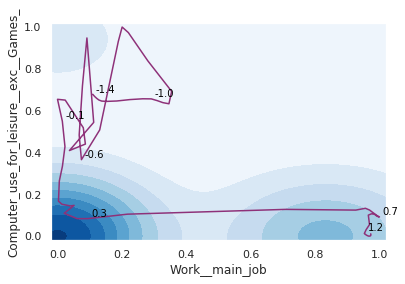

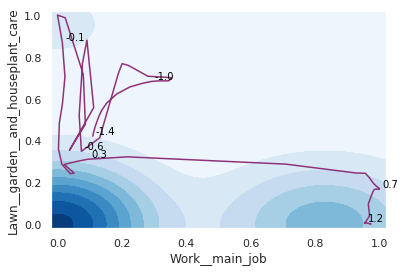

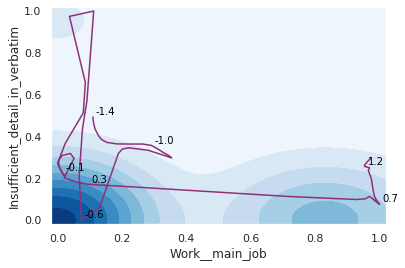

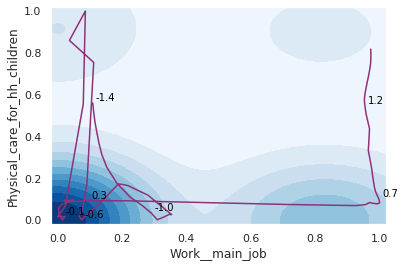

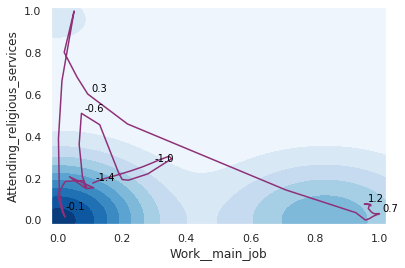

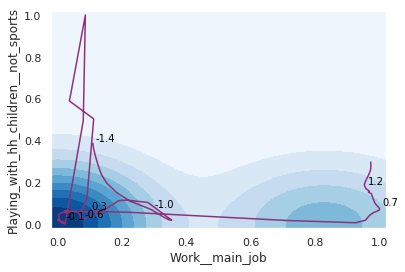

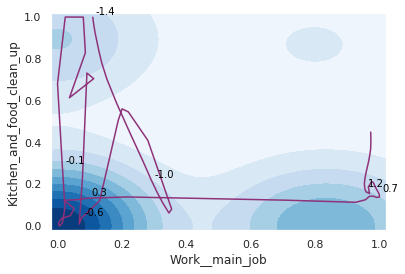

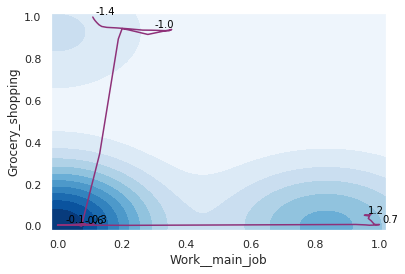

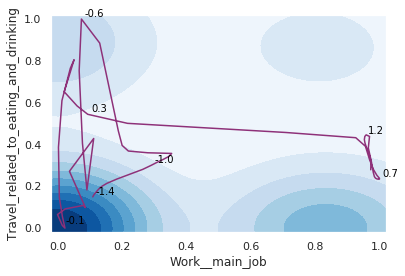

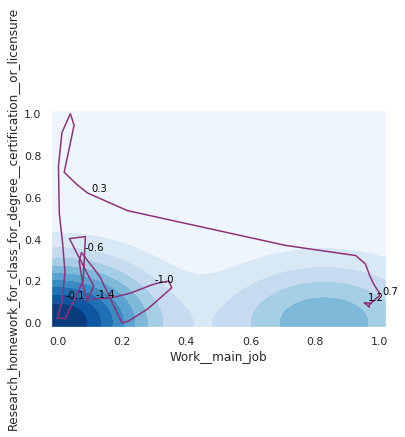

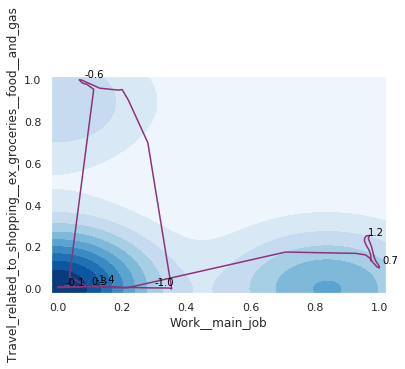

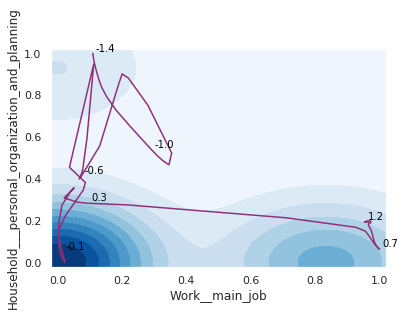

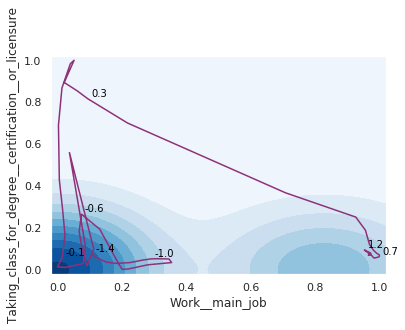

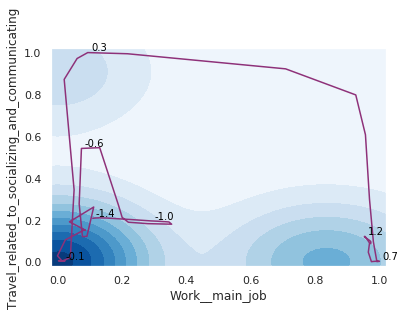

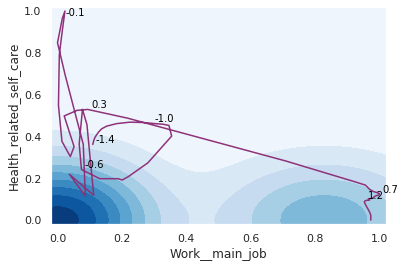

In [15]:
for field in filtered.columns[0:29]:
    
     encode_plot2d(vae.encoder,vae.decoder, qt, y_col=field)

In [16]:
filtered-qt

Sleeping  ...  Public_health_activities
0      0.423764  ...                  0.075824
1      0.036463  ...                  0.249368
2      0.462162  ...                  0.189018
3      0.085971  ...                  0.126639
4      0.330574  ...                  0.057696
...         ...  ...                       ...
11380  0.734704  ...                  0.057441
11381  0.069284  ...                  0.131575
11382 -0.482761  ...                  0.129033
11383  0.422079  ...                  0.110929
11384  0.702836  ...                  0.277283

[11385 rows x 389 columns]

In [0]:
pd.DataFrame(encoded_data).to_csv("encoded_data.csv", header=False, index=False)


In [0]:
vae.encoder.save_weights('encoder')

In [0]:
vae.decoder.save_weights('decoder')

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [21]:
!ls "/content/drive/My Drive/VAEs-in-Economics/Resources"

decoder.data-00000-of-00002
decoder.data-00001-of-00002
decoder.index
encoded_data.csv
encoder.data-00000-of-00002
encoder.data-00001-of-00002
encoder.index
EqualSizedBins.png
PaintedStones.png
type_plot.png
VAE.png
VAE.pptx
Work__main_job_Attending_religious_services.png
Work__main_job_Computer_use_for_leisure__exc__Games_.png
Work__main_job_Eating_and_drinking.png
Work__main_job_Food_and_drink_preparation_.png
Work__main_job_Grocery_shopping.png
Work__main_job_Health_related_self_care.png
Work__main_job_Household___personal_organization_and_planning.png
Work__main_job_Insufficient_detail_in_verbatim.png
Work__main_job_Interior_cleaning.png
Work__main_job_Kitchen_and_food_clean_up.png
Work__main_job_Laundry.png
Work__main_job_Lawn__garden__and_houseplant_care.png
Work__main_job_Physical_care_for_hh_children.png
Work__main_job_Playing_games.png
Work__main_job_Playing_with_hh_children__not_sports.png
Work__main_job_Reading_for_personal_interest.png
Work__main_job_Relaxing__thinking_.png

In [0]:
!cp *.png "/content/drive/My Drive/VAEs-in-Economics/Resources"

In [0]:
!cp *.csv "/content/drive/My Drive/VAEs-in-Economics/Resources"

In [0]:
!cp encoder.* "/content/drive/My Drive/VAEs-in-Economics/Resources"

In [0]:
!cp decoder.* "/content/drive/My Drive/VAEs-in-Economics/Resources"